In [428]:
import sys
from pandas import DataFrame 
import pandas as pd
import numpy as np

# **Q1:缺失值分析与处理**

## 1.1 缺失值可视化
合并数据集；
绘制缺失值情况图；
绘制缺失值相关热图；

## 1.2 缺失值处理

In [636]:
from numpy import NAN
dataset = pd.read_csv('data/dataset_all.csv')
dataset['team'] = ''
dataset['team'].iloc[0:17] = '广东东莞大益'
dataset['team'].iloc[17:36] = '辽宁本钢'
dataset['team'].iloc[36:54] = '浙江稠州金租'
dataset['team'].iloc[54:71] = '山东高速'
dataset['team'].iloc[71:88] = '新疆伊力王酒'
dataset['team'].iloc[88:105] = '青岛每日优鲜'
dataset['team'].iloc[105:125] = '浙江广厦控股'
dataset['team'].iloc[125:148] = '北京首钢'
dataset['team'].iloc[148:166] = '深圳马可波罗'
dataset['team'].iloc[166:183] = '九台农商银行'
dataset['team'].iloc[183:203] = '四川金荣实业'
dataset['team'].iloc[203:224] = '时代中国广州'
dataset['team'].iloc[224:242] = '北京控股'
dataset['team'].iloc[242:261] = '上海久事'
dataset['team'].iloc[261:284] = '山西汾酒股份'
dataset['team'].iloc[284:305] = '福建浔兴股份'
dataset['team'].iloc[305:326] = '天津先行者'
dataset['team'].iloc[326:348] = '南京同曦宙光'
dataset['team'].iloc[348:369] = '苏州肯帝亚'
dataset['team'].iloc[369:] = '宁波甬兴证券'
dataset.replace('·',np.nan,inplace = True)
dataset

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move,team,sp_en_score,ball_score,test_score
0,马力克,19,197.0,94.0,198.0,19.5,8.5,256.0,333.0,344.0,3.333,12.267,广东东莞大益,140,58,198
1,王薪凯,26,197.0,92.0,192.0,20.0,8.5,251.0,320.0,332.0,3.439,11.819,广东东莞大益,118,120,238
2,赵睿,25,195.0,93.0,194.0,20.0,8.5,245.0,320.0,337.0,3.348,10.986,广东东莞大益,138,104,242
3,赵锦洋,20,197.0,81.0,195.0,20.5,8.0,251.0,331.0,342.0,3.237,11.353,广东东莞大益,132,70,202
4,徐昕,18,226.0,112.0,226.0,22.0,10.0,288.0,349.0,363.0,3.469,12.874,广东东莞大益,90,90,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,李文豪,20,208.0,86.0,208.0,21.5,9.0,263.0,336.0,349.0,3.261,11.626,宁波甬兴证券,150,70,220
387,主昊,22,205.0,103.0,205.0,20.5,9.0,265.0,323.0,329.0,3.532,11.923,宁波甬兴证券,134,57,191
388,张彪,31,201.0,101.0,204.0,21.0,9.0,261.0,321.0,340.0,3.551,12.206,宁波甬兴证券,NaN,NaN,NaN
389,曲虹霖,19,207.0,103.0,215.0,22.0,9.0,269.0,334.0,336.0,3.363,11.632,宁波甬兴证券,NaN,NaN,NaN


# 缺失值分析

In [646]:
#dataset.describe().to_excel('describe/all.xls')

<AxesSubplot:>

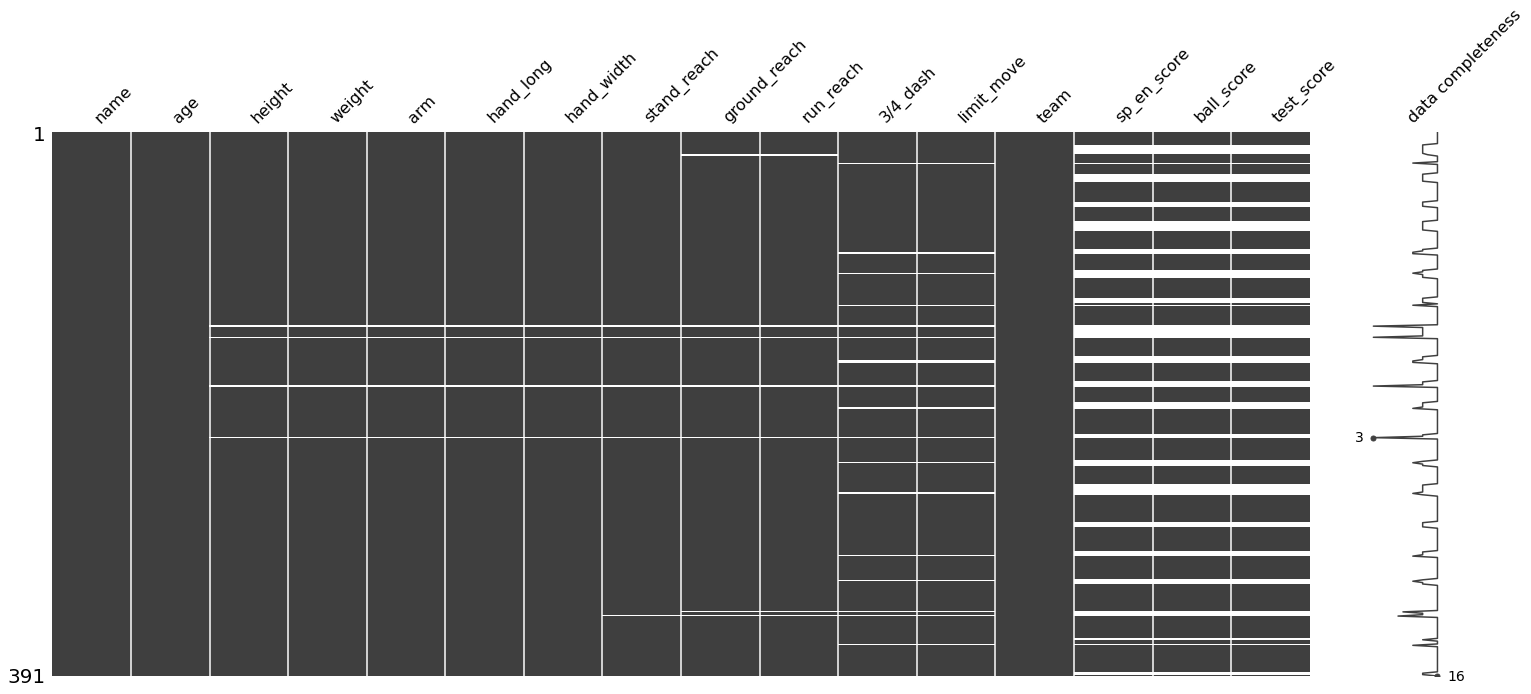

In [594]:
import missingno as msno
import matplotlib as plt
msno.matrix(dataset, labels=True)

In [595]:
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [596]:
def drop_col(df, cutoff=0):
  n = len(df)
  cnt = df.count()
  cnt = cnt / n # 求出非nan值的百分比
  return df.loc[:, cnt[cnt >= cutoff].index]

def drop_row(df, cutoff=0.5):
  n = len(df.columns)
  cnt = df.count(axis='columns')
  cnt = cnt / n # 求出非nan值的百分比
  return df.loc[cnt[cnt >= cutoff].index,:],df.loc[cnt[cnt < cutoff].index,:]

In [597]:
def minmax(dataset):
       return (dataset-dataset.min())/(dataset.max()-dataset.min()),dataset.min(),(dataset.max()-dataset.min())

In [598]:
dataset[['arm','sp_en_score', 'ball_score','test_score']]=dataset[['arm','sp_en_score', 'ball_score','test_score']].astype('float')

In [599]:
dataset[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width', 'stand_reach',
     'ground_reach', 'run_reach', '3/4_dash', 'limit_move', 'sp_en_score',
     'ball_score', 'test_score']],min,mmgap = minmax(dataset[['age', 'height', 'weight', 'arm',
                                                'hand_long', 'hand_width', 'stand_reach', 'ground_reach', 'run_reach',
                                                '3/4_dash', 'limit_move', 'sp_en_score', 'ball_score', 'test_score']])

In [600]:
dataset.dtypes

name             object
age             float64
height          float64
weight          float64
arm             float64
hand_long       float64
hand_width      float64
stand_reach     float64
ground_reach    float64
run_reach       float64
3/4_dash        float64
limit_move      float64
team             object
sp_en_score     float64
ball_score      float64
test_score      float64
dtype: object

In [601]:
dataset.shape

(391, 16)

In [602]:
#df=drop_col(df=dataset)
df,drop=drop_row(dataset)
df.shape

(387, 16)

In [603]:
drop

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move,team,sp_en_score,ball_score,test_score
139,高升,0.352941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,北京首钢,NaN,NaN,NaN
147,曾凡博,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,北京首钢,NaN,NaN,NaN
182,朱恩彤,0.235294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,九台农商银行,NaN,NaN,NaN
219,王泉泽,0.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,时代中国广州,NaN,NaN,NaN


In [604]:
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move']])
dataset_imputed = pd.DataFrame(imputed, columns=['height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move'])

In [605]:
dataset_imputed

,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move
0,0.395833,0.378378,0.433333,0.214286,0.285714,0.449275,0.661538,0.619048,0.211217,0.364435
1,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.461538,0.476190,0.253381,0.270711
2,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.461538,0.535714,0.217184,0.096444
3,0.395833,0.202703,0.383333,0.357143,0.142857,0.376812,0.630769,0.595238,0.173031,0.173222
4,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,0.265314,0.491423
...,...,...,...,...,...,...,...,...,...,...
382,0.625000,0.270270,0.600000,0.500000,0.428571,0.550725,0.707692,0.678571,0.182578,0.230335
383,0.562500,0.500000,0.550000,0.357143,0.428571,0.579710,0.507692,0.440476,0.290374,0.292469
384,0.479167,0.472973,0.533333,0.428571,0.428571,0.521739,0.476923,0.571429,0.297932,0.351674
385,0.604167,0.500000,0.716667,0.571429,0.428571,0.637681,0.676923,0.523810,0.223150,0.231590


In [606]:
df=df.reset_index(drop=True)
df[['height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move']]=dataset_imputed

In [607]:
df

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move,team,sp_en_score,ball_score,test_score
0,马力克,0.058824,0.395833,0.378378,0.433333,0.214286,0.285714,0.449275,0.661538,0.619048,0.211217,0.364435,广东东莞大益,0.933333,0.089888,0.614407
1,王薪凯,0.470588,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.461538,0.476190,0.253381,0.270711,广东东莞大益,0.786667,0.786517,0.783898
2,赵睿,0.411765,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.461538,0.535714,0.217184,0.096444,广东东莞大益,0.920000,0.606742,0.800847
3,赵锦洋,0.117647,0.395833,0.202703,0.383333,0.357143,0.142857,0.376812,0.630769,0.595238,0.173031,0.173222,广东东莞大益,0.880000,0.224719,0.631356
4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,0.265314,0.491423,广东东莞大益,0.600000,0.449438,0.538136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,李文豪,0.117647,0.625000,0.270270,0.600000,0.500000,0.428571,0.550725,0.707692,0.678571,0.182578,0.230335,宁波甬兴证券,1.000000,0.224719,0.707627
383,主昊,0.235294,0.562500,0.500000,0.550000,0.357143,0.428571,0.579710,0.507692,0.440476,0.290374,0.292469,宁波甬兴证券,0.893333,0.078652,0.584746
384,张彪,0.764706,0.479167,0.472973,0.533333,0.428571,0.428571,0.521739,0.476923,0.571429,0.297932,0.351674,宁波甬兴证券,NaN,NaN,NaN
385,曲虹霖,0.058824,0.604167,0.500000,0.716667,0.571429,0.428571,0.637681,0.676923,0.523810,0.223150,0.231590,宁波甬兴证券,NaN,NaN,NaN


<AxesSubplot:>

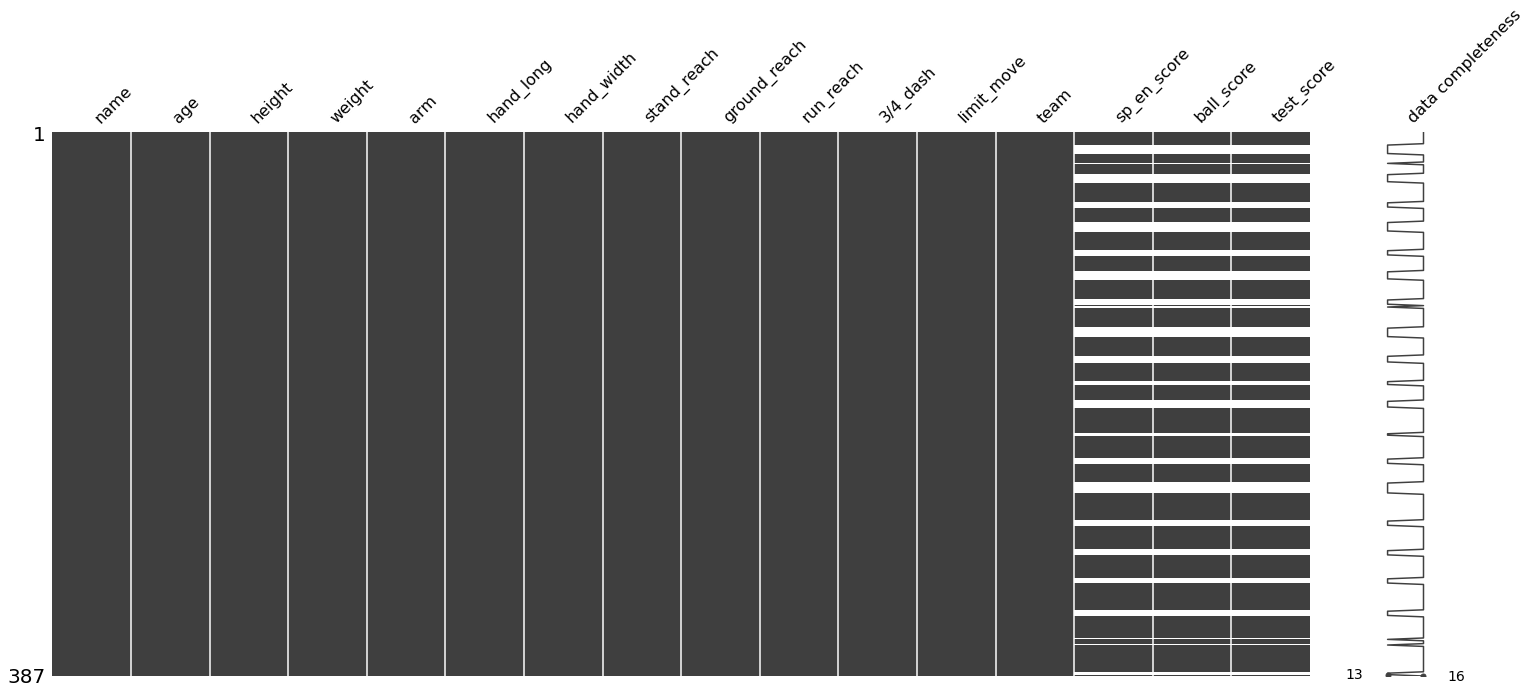

In [608]:
msno.matrix(df, labels=True)

In [609]:
df.columns

Index(['name', 'age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
       'team', 'sp_en_score', 'ball_score', 'test_score'],
      dtype='object')

In [610]:
df['arm+height']=df['arm']+df['height']
df['ground_jump']=df['ground_reach']-df['stand_reach']
df['run_jump']=df['run_reach']-df['stand_reach']

In [611]:
df.columns

Index(['name', 'age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
       'team', 'sp_en_score', 'ball_score', 'test_score', 'arm+height',
       'ground_jump', 'run_jump'],
      dtype='object')

In [612]:
col_labels=['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score']

In [613]:
matrix=df[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score']].corr().to_numpy()

In [614]:
matrix

array([[ 1.        ,  0.77943181,  0.92285648,  0.74775044,  0.48911578,
         0.96717276,  0.80488941,  0.7077144 ,  0.32675711,  0.43369819,
        -0.00416042, -0.10851701, -0.09298295],
       [ 0.77943181,  1.        ,  0.7828958 ,  0.69198475,  0.57959153,
         0.796893  ,  0.5579976 ,  0.44102135,  0.44251273,  0.51514425,
        -0.25147708, -0.00694096, -0.22693833],
       [ 0.92285648,  0.7828958 ,  1.        ,  0.81170583,  0.50447303,
         0.95427042,  0.80771314,  0.70165924,  0.31999577,  0.43036294,
        -0.00513713, -0.11967956, -0.10303034],
       [ 0.74775044,  0.69198475,  0.81170583,  1.        ,  0.5549005 ,
         0.77875622,  0.65190382,  0.56296961,  0.27506011,  0.38098793,
        -0.03944314, -0.09755091, -0.11499479],
       [ 0.48911578,  0.57959153,  0.50447303,  0.5549005 ,  1.        ,
         0.49655591,  0.34824625,  0.28780793,  0.23381059,  0.3192303 ,
        -0.11212562, -0.05269741, -0.14201374],
       [ 0.96717276,  0.796893

In [615]:
df['age_reversed']=1-df['age']
df['3/4_dash_reversed']=1-df['3/4_dash']
df['limit_move_reversed']=1-df['limit_move']

In [616]:
import matplotlib
import matplotlib.pyplot as plt

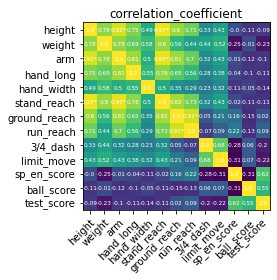

In [617]:

fig, ax = plt.subplots()

im = ax.imshow(matrix)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(col_labels)), labels=col_labels)
ax.set_yticks(np.arange(len(col_labels)), labels=col_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.

for i in range(len(col_labels)):
    for j in range(len(col_labels)):
        if i!=j and matrix[i,j]>0.9:
            info=str(round(matrix[i, j],2))+'*'
        else:
            info=round(matrix[i, j],2)
        text = ax.text(i, j, info,
                       ha="center", va="center", color="w",size='xx-small')


#plt.figure(dpi=100,figsize=(5,4))
ax.set_title("correlation_coefficient")
fig.tight_layout()
plt.show()

In [618]:
fig.savefig('corr.jpeg',  dpi=400)

<AxesSubplot:>

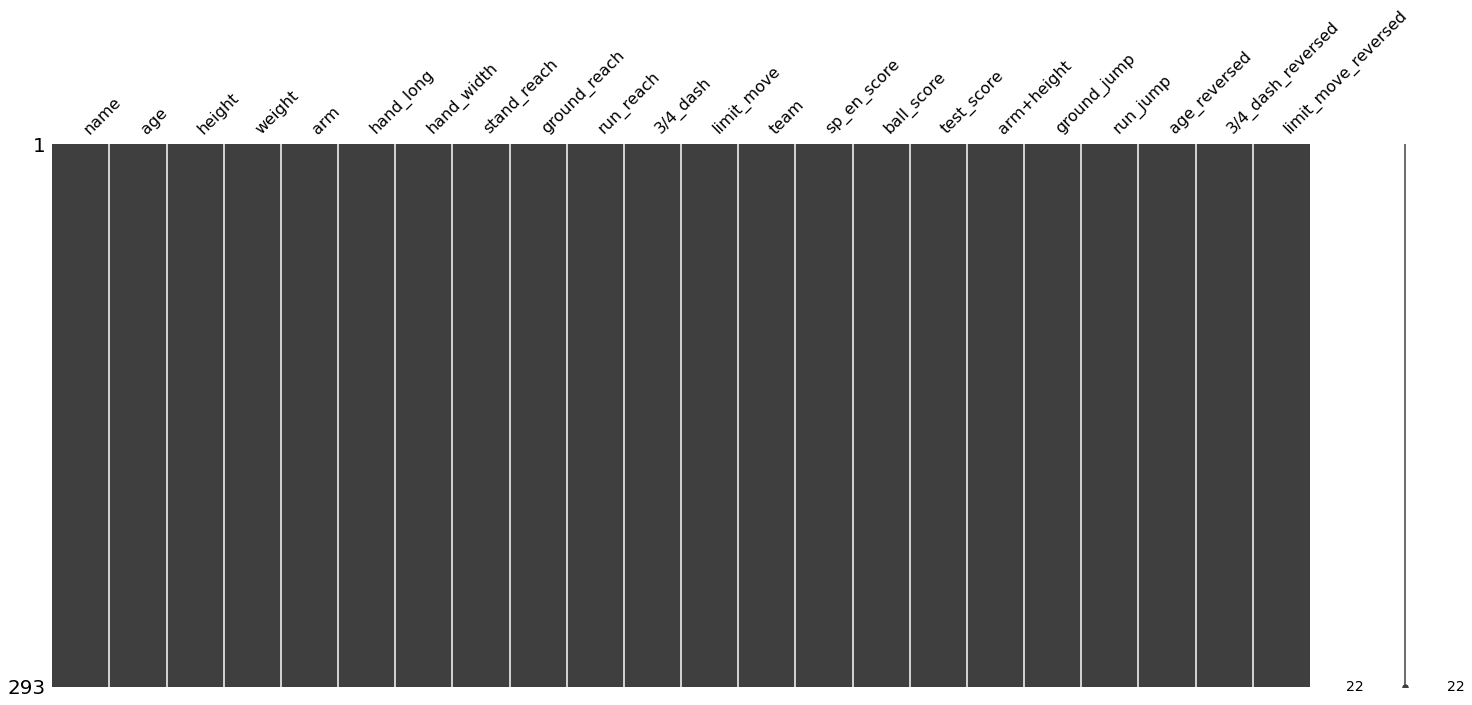

In [619]:
msno.matrix(df.dropna())

In [620]:
tmp=df.dropna()

In [621]:
tmp.dtypes

name                    object
age                    float64
height                 float64
weight                 float64
arm                    float64
hand_long              float64
hand_width             float64
stand_reach            float64
ground_reach           float64
run_reach              float64
3/4_dash               float64
limit_move             float64
team                    object
sp_en_score            float64
ball_score             float64
test_score             float64
arm+height             float64
ground_jump            float64
run_jump               float64
age_reversed           float64
3/4_dash_reversed      float64
limit_move_reversed    float64
dtype: object

In [622]:
tmp[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width', 'stand_reach',
    'ground_reach', 'run_reach', '3/4_dash','limit_move', 'sp_en_score',
    'ball_score', 'test_score','ground_jump','run_jump']],_,_ = minmax(tmp[['age', 'height', 'weight', 'arm',
    'hand_long', 'hand_width', 'stand_reach','ground_reach', 'run_reach', '3/4_dash','limit_move', 'sp_en_score', 'ball_score','test_score','ground_jump','run_jump']])

In [623]:
tmp.to_excel('data/scaled_dropna.xls')

In [624]:
df.dropna().to_excel('data/dropna.xls')

In [625]:
df.columns

Index(['name', 'age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
       'team', 'sp_en_score', 'ball_score', 'test_score', 'arm+height',
       'ground_jump', 'run_jump', 'age_reversed', '3/4_dash_reversed',
       'limit_move_reversed'],
      dtype='object')

In [626]:
imputed2=imputer.fit_transform(df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score']])
dataset_imputed2 = pd.DataFrame(imputed2, columns=['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score'])

In [627]:
dataset_imputed2

,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move,sp_en_score,ball_score,test_score
0,0.058824,0.395833,0.378378,0.433333,0.214286,0.285714,0.449275,0.661538,0.619048,0.211217,0.364435,0.933333,0.089888,0.614407
1,0.470588,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.461538,0.476190,0.253381,0.270711,0.786667,0.786517,0.783898
2,0.411765,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.461538,0.535714,0.217184,0.096444,0.920000,0.606742,0.800847
3,0.117647,0.395833,0.202703,0.383333,0.357143,0.142857,0.376812,0.630769,0.595238,0.173031,0.173222,0.880000,0.224719,0.631356
4,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,0.265314,0.491423,0.600000,0.449438,0.538136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.117647,0.625000,0.270270,0.600000,0.500000,0.428571,0.550725,0.707692,0.678571,0.182578,0.230335,1.000000,0.224719,0.707627
383,0.235294,0.562500,0.500000,0.550000,0.357143,0.428571,0.579710,0.507692,0.440476,0.290374,0.292469,0.893333,0.078652,0.584746
384,0.764706,0.479167,0.472973,0.533333,0.428571,0.428571,0.521739,0.476923,0.571429,0.297932,0.351674,0.874667,0.569663,0.758051
385,0.058824,0.604167,0.500000,0.716667,0.571429,0.428571,0.637681,0.676923,0.523810,0.223150,0.231590,0.958667,0.357303,0.731356


In [628]:
df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score']]=dataset_imputed2

<AxesSubplot:>

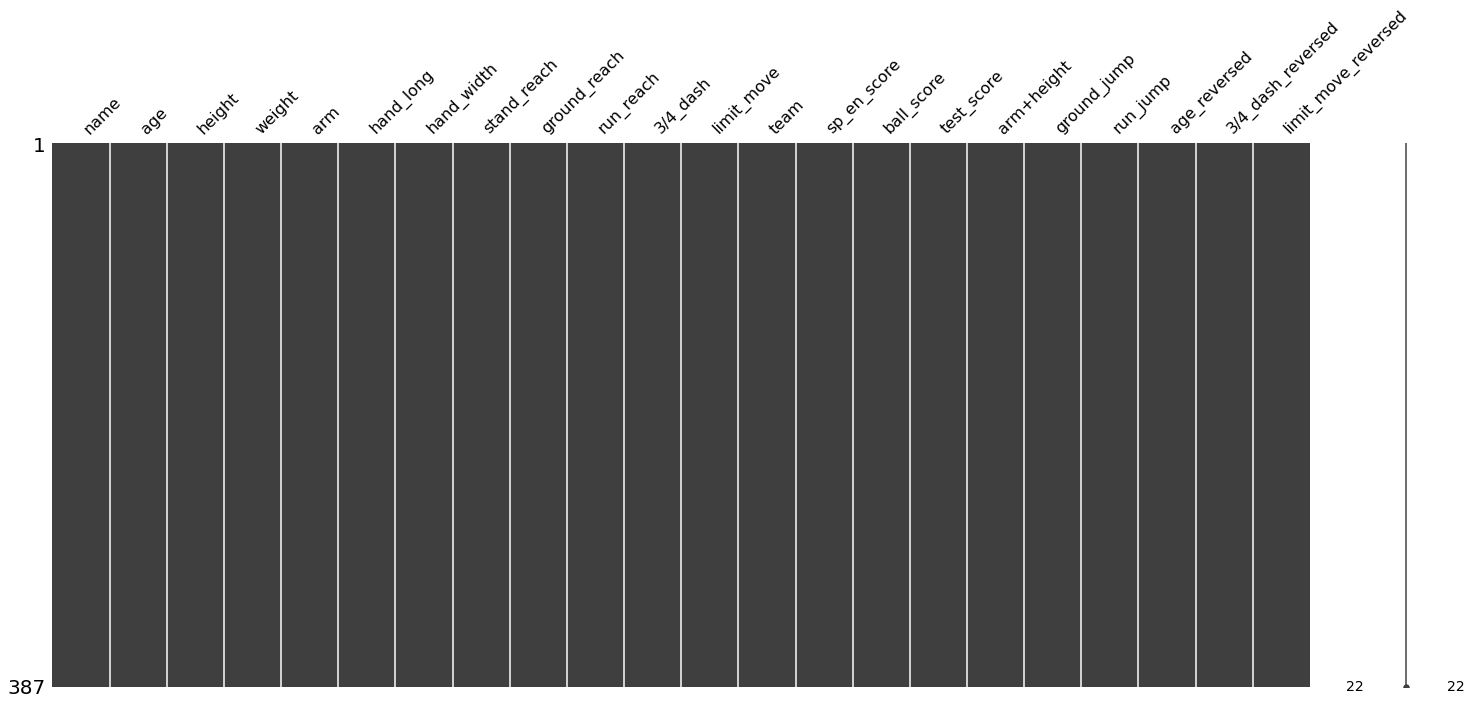

In [629]:
msno.matrix(df)

In [630]:
df[['age','height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score','ground_jump','run_jump']],_,_=minmax(df[['age','height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score','ground_jump','run_jump']])

In [631]:
df.to_excel('data/all_imputed.xls')

In [638]:
df.dtypes

name                    object
age                    float64
height                 float64
weight                 float64
arm                    float64
hand_long              float64
hand_width             float64
stand_reach            float64
ground_reach           float64
run_reach              float64
3/4_dash               float64
limit_move             float64
team                    object
sp_en_score            float64
ball_score             float64
test_score             float64
arm+height             float64
ground_jump            float64
run_jump               float64
age_reversed           float64
3/4_dash_reversed      float64
limit_move_reversed    float64
dtype: object

In [639]:
tmp=df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score','test_score']]*mmgap+min
tmp[['name','team']]=df[['name','team']]


In [641]:
position=pd.read_excel('data/位置2.xlsx')[['name','positions']]
tmp=pd.merge(tmp,position,on='name')
tmp

,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move,sp_en_score,ball_score,test_score,name,team,positions
0,19.0,197.0,94.0,198.0,19.5,8.5,256.0,333.0,344.0,3.333,12.267,140.0,58.0,198.0,马力克,广东东莞大益,SG
1,26.0,197.0,92.0,192.0,20.0,8.5,251.0,320.0,332.0,3.439,11.819,118.0,120.0,238.0,王薪凯,广东东莞大益,SF
2,25.0,195.0,93.0,194.0,20.0,8.5,245.0,320.0,337.0,3.348,10.986,138.0,104.0,242.0,赵睿,广东东莞大益,SG
3,20.0,197.0,81.0,195.0,20.5,8.0,251.0,331.0,342.0,3.237,11.353,132.0,70.0,202.0,赵锦洋,广东东莞大益,SG
4,18.0,226.0,112.0,226.0,22.0,10.0,288.0,349.0,363.0,3.469,12.874,90.0,90.0,180.0,徐昕,广东东莞大益,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,20.0,208.0,86.0,208.0,21.5,9.0,263.0,336.0,349.0,3.261,11.626,150.0,70.0,220.0,李文豪,宁波甬兴证券,SF
383,22.0,205.0,103.0,205.0,20.5,9.0,265.0,323.0,329.0,3.532,11.923,134.0,57.0,191.0,主昊,宁波甬兴证券,C
384,31.0,201.0,101.0,204.0,21.0,9.0,261.0,321.0,340.0,3.551,12.206,131.2,100.7,231.9,张彪,宁波甬兴证券,PF
385,19.0,207.0,103.0,215.0,22.0,9.0,269.0,334.0,336.0,3.363,11.632,143.8,81.8,225.6,曲虹霖,宁波甬兴证券,C


In [643]:
t_G=tmp[tmp['positions'].isin(['PG','SG'])]
t_G['label']='G'
t_C=tmp[tmp['positions'].isin(['C'])]
t_C['label']='C'
t_F=tmp[tmp['positions'].isin(['PF','SF'])]
t_F['label']='F'

In [644]:
t_C.describe().to_excel('describe/C.xls')
t_F.describe().to_excel('describe/F.xls')
t_G.describe().to_excel('describe/G.xls')

# topsis

In [475]:
def entropyWeight(data):
	data = np.array(data)
	# 归一化
	P = data / data.sum(axis=0)
	# 计算熵值
	E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)
	# 计算权系数
	return (1 - E) / (1 - E).sum()


def topsis(data, weight=None):
	# 归一化
	data = data / np.sqrt((data ** 2).sum())

	# 最优最劣方案
	Z = pd.DataFrame([data.min(), data.max()], index=['D-', 'D+'])

	# 距离
	weight = entropyWeight(data) if weight is None else np.array(weight)
	Result = data.copy()
	Result['D+'] = np.sqrt(((data - Z.loc['D+']) ** 2 * weight).sum(axis=1))
	Result['D-'] = np.sqrt(((data - Z.loc['D-']) ** 2 * weight).sum(axis=1))

	# 综合得分指数
	Result['res'] = Result['D-'] / (Result['D-'] + Result['D+'])

	return Result, Z, weight

In [476]:
df.columns

Index(['name', 'age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
       'team', 'sp_en_score', 'ball_score', 'test_score', 'arm+height',
       'ground_jump', 'run_jump', 'age_reversed', '3/4_dash_reversed',
       'limit_move_reversed'],
      dtype='object')

In [477]:
df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score', 'test_score', 'arm+height',
       'ground_jump']]

,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,3/4_dash,limit_move,sp_en_score,ball_score,test_score,arm+height,ground_jump
0,0.058824,0.395833,0.378378,0.433333,0.214286,0.285714,0.449275,0.661538,0.619048,0.211217,0.364435,0.933333,0.089888,0.614407,0.829167,0.820650
1,0.470588,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.461538,0.476190,0.253381,0.270711,0.786667,0.786517,0.783898,0.729167,0.640038
2,0.411765,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.461538,0.535714,0.217184,0.096444,0.920000,0.606742,0.800847,0.720833,0.763183
3,0.117647,0.395833,0.202703,0.383333,0.357143,0.142857,0.376812,0.630769,0.595238,0.173031,0.173222,0.880000,0.224719,0.631356,0.779167,0.879697
4,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,0.265314,0.491423,0.600000,0.449438,0.538136,1.900000,0.512472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.117647,0.625000,0.270270,0.600000,0.500000,0.428571,0.550725,0.707692,0.678571,0.182578,0.230335,1.000000,0.224719,0.707627,1.225000,0.742343
383,0.235294,0.562500,0.500000,0.550000,0.357143,0.428571,0.579710,0.507692,0.440476,0.290374,0.292469,0.893333,0.078652,0.584746,1.112500,0.418061
384,0.764706,0.479167,0.472973,0.533333,0.428571,0.428571,0.521739,0.476923,0.571429,0.297932,0.351674,0.874667,0.569663,0.758051,1.012500,0.456584
385,0.058824,0.604167,0.500000,0.716667,0.571429,0.428571,0.637681,0.676923,0.523810,0.223150,0.231590,0.958667,0.357303,0.731356,1.320833,0.575624


In [478]:
df['res']=topsis(df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score', 'test_score', 'arm+height',
       'ground_jump']])[0]['res']

In [479]:
df.to_excel('output/topsis.xls')

In [480]:
df['res'] = topsis(df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach', 'ground_reach', 'run_reach', '3/4_dash', 'limit_move','sp_en_score', 'ball_score', 'test_score']])[0]['res']

In [481]:
topsis(df[['age_reversed', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_reach', 'run_reach', '3/4_dash_reversed', 'limit_move_reversed',
        'sp_en_score', 'ball_score', 'test_score']])[2]

array([0.07930875, 0.12819026, 0.11392016, 0.0796576 , 0.09648754,
       0.07249061, 0.10895339, 0.08681854, 0.04707289, 0.01117237,
       0.0397257 , 0.01288076, 0.11345757, 0.00986389])

In [482]:
df.sort_values(by='res',ascending=False).to_excel('topsis_output.xlsx')

In [483]:
df.loc[df[df['team'] == '广东东莞大益'].index,:].sort_values(by='res',
                                                       ascending=False)

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,...,sp_en_score,ball_score,test_score,arm+height,ground_jump,run_jump,age_reversed,3/4_dash_reversed,limit_move_reversed,res
13,易建联,0.941176,0.708333,0.729730,0.866667,0.857143,1.000000,0.753623,0.723077,0.559524,...,0.668000,0.520225,0.608051,1.575000,0.476792,0.210049,0.058824,0.551313,0.072385,0.699568
14,苏伟,0.823529,0.750000,0.810811,0.733333,0.714286,0.571429,0.782609,0.415385,0.452381,...,0.660000,0.548315,0.613559,1.483333,0.000000,0.026518,0.176471,0.620525,0.254603,0.629762
8,张明池,0.058824,0.729167,0.594595,0.566667,0.571429,0.714286,0.637681,0.476923,0.464286,...,0.866667,0.000000,0.538136,1.295833,0.292390,0.237962,0.941176,0.407319,0.059414,0.521537
4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,...,0.600000,0.449438,0.538136,1.900000,0.512472,0.380321,1.000000,0.734686,0.508577,0.514459
10,任骏飞,0.764706,0.520833,0.405405,0.566667,0.428571,0.428571,0.579710,0.523077,0.428571,...,0.854667,0.410112,0.685169,1.087500,0.439848,0.267969,0.235294,0.548926,0.525314,0.512049
9,周鹏,0.823529,0.583333,0.513514,0.533333,0.428571,0.428571,0.579710,0.569231,0.500000,...,0.813333,0.529213,0.703814,1.116667,0.505210,0.364271,0.176471,0.765314,0.572176,0.498218
15,杜润旺,0.235294,0.583333,0.581081,0.566667,0.428571,0.428571,0.550725,0.569231,0.535714,...,0.842667,0.412360,0.678390,1.150000,0.546258,0.451500,0.764706,0.671042,0.349372,0.463012
6,曾繁日,0.411765,0.562500,0.567568,0.683333,0.357143,0.571429,0.623188,0.692308,0.642857,...,0.733333,0.584270,0.673729,1.245833,0.617935,0.498255,0.588235,0.762132,0.825732,0.444124
1,王薪凯,0.470588,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.461538,0.476190,...,0.786667,0.786517,0.783898,0.729167,0.640038,0.605722,0.529412,0.746619,0.729289,0.387184
5,张昊,0.058824,0.562500,0.418919,0.550000,0.500000,0.285714,0.608696,0.723077,0.773810,...,0.960000,0.157303,0.656780,1.112500,0.682033,0.694348,0.941176,0.792363,0.668410,0.376462


In [484]:
factor_analysis=sklearn.decomposition.FactorAnalysis(n_components=5,rotation='varimax')

In [485]:
X=df[['age_reversed', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash_reversed', 'limit_move_reversed',
        'sp_en_score', 'ball_score']]

In [486]:
X_orgin=df[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]

In [487]:
fa_output=factor_analysis.fit_transform(X)
fa_output

array([[ 0.16948412,  1.17552649,  0.45575915,  1.41804913,  1.04562174],
       [-0.27969836,  0.17831062, -0.03867505,  0.98290231, -1.28642001],
       [-0.52761336,  1.13049442, -0.36818356,  0.18218785, -0.47728688],
       ...,
       [ 0.41622764, -0.33672001, -0.02697073,  0.18837089, -0.59714667],
       [ 1.10827469, -0.43584539, -0.84063272, -0.02957998,  0.87430927],
       [-0.34137765, -1.14389815, -1.44600812, -0.35981268,  0.88060364]])

In [488]:
factor_analysis.components_

array([[-0.01408753,  0.18750029,  0.13783571,  0.16534243,  0.13444368,
         0.08157225,  0.18551541, -0.03436371, -0.09465713, -0.02462845,
        -0.06196169, -0.00414995, -0.01694269],
       [ 0.05256603, -0.02340134, -0.04885892, -0.01550272, -0.01030525,
        -0.02533974, -0.02699583,  0.13662545,  0.13018463,  0.03971175,
         0.04363031,  0.03989223, -0.00850435],
       [-0.03353485,  0.01499777,  0.03618228,  0.01248886,  0.01109332,
         0.01653218,  0.00894118, -0.01559997, -0.03065019, -0.06912439,
        -0.11892545, -0.03118493,  0.01280707],
       [ 0.06557861,  0.00729547, -0.03793275, -0.02009112, -0.07042761,
        -0.06494341,  0.00226489,  0.00515345,  0.0120044 ,  0.00443057,
         0.01108463,  0.02094806,  0.00132269],
       [ 0.07171088,  0.00521499, -0.02233715,  0.00460933,  0.00041073,
         0.00161075,  0.00172482,  0.01186334,  0.00695128,  0.00588781,
         0.02098063,  0.05542478, -0.12328264]])

Text(86.09375, 0.5, 'Sepal Width')

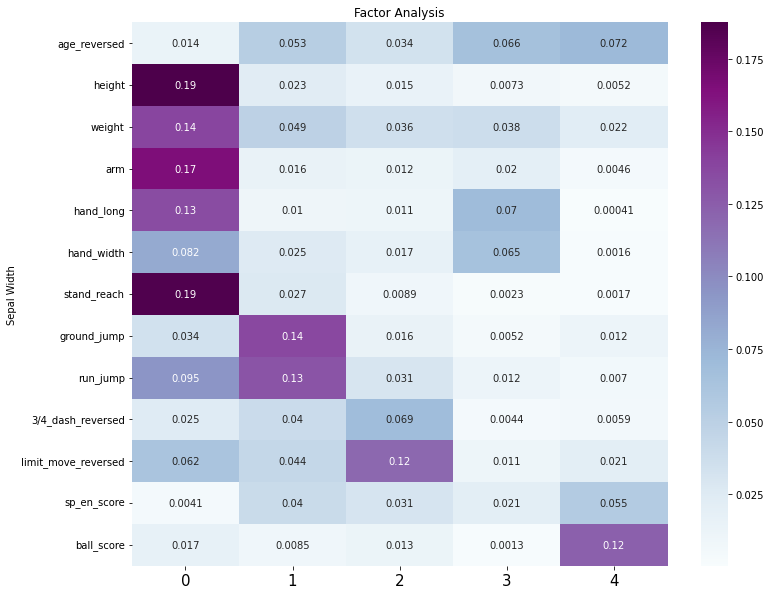

In [489]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(factor_analysis.components_).T,index=X.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [490]:
fig.savefig('sci_fa.jpeg')

In [491]:
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")

In [492]:
from factor_analyzer.factor_analyzer \
    import calculate_bartlett_sphericity,calculate_kmo
chi_square_value, p_value = calculate_bartlett_sphericity(X)

In [493]:
chi_square_value, p_value

(4372.34769489579, 0.0)

In [494]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(X)
kmo_model

0.8705454793297261

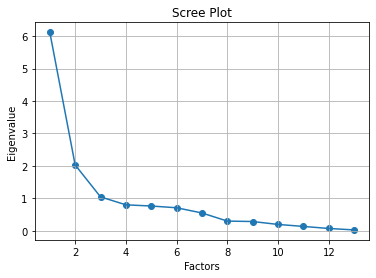

In [495]:
fa = FactorAnalyzer(25,rotation=None)
fa.fit(X)

ev,v = fa.get_eigenvalues()


# 可视化
# plot横轴是指标个数，纵轴是ev值
# scatter横轴是指标个数，纵轴是ev值

plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [496]:
v[0:3]

array([5.99981535, 1.73561508, 0.66199825])

In [497]:
v[0:3].sum()/v.sum()

0.851586691939061

In [498]:
fa = FactorAnalyzer(5, rotation="promax")
fa.fit(X)

# # 14*5(变量个数*因子个数)
fa.loadings_

array([[ 3.30032361e-02,  7.45470690e-02,  2.56082642e-02,
        -1.91254891e-01, -2.88779933e-01],
       [ 9.71837947e-01, -7.02196442e-02, -6.87033325e-02,
         7.12619890e-02, -1.28490399e-01],
       [ 6.01882726e-01, -7.44778244e-02, -6.55623830e-02,
         1.44282619e-02,  3.62335751e-01],
       [ 9.49229602e-01,  1.62426861e-02, -3.29051952e-02,
         4.95248385e-02,  4.28872808e-02],
       [ 7.12201374e-01,  1.39047067e-01,  5.55807566e-02,
        -2.17087995e-02,  4.33180040e-01],
       [ 3.41215688e-01,  5.32567116e-02,  6.15235135e-02,
        -1.46041490e-01,  5.64409486e-01],
       [ 9.93430087e-01, -1.06432023e-01, -1.75315447e-02,
         8.57097576e-02, -1.03757215e-01],
       [ 6.25213157e-02,  9.68621073e-01, -7.66528007e-02,
         5.69193401e-02,  1.03032580e-02],
       [-2.72341846e-01,  8.57046248e-01,  4.39970146e-04,
         6.03543952e-02,  2.66046012e-02],
       [ 1.81308471e-02,  1.46630808e-01,  7.08422903e-01,
         5.65025203e-02

In [499]:
fa.fit_transform(X)

array([[ 0.1264094 ,  1.10203702,  0.29158607, -1.7048    , -1.42923293],
       [-0.46976226,  0.05081358,  0.15487375,  1.46867203, -0.38799842],
       [-0.65160381,  1.2416461 ,  1.13822136,  0.43805571, -0.56955545],
       ...,
       [ 0.38142852, -0.35234279, -0.26434842,  0.66708093,  0.25245738],
       [ 1.12396528, -0.68583838,  0.38047813, -0.56353346,  0.01014569],
       [-0.19281588, -0.51117778,  1.12730352, -1.15316647, -0.00659643]])

In [500]:
#np.dot(X.to_numpy(),fa.weights_)

In [501]:
fa.get_eigenvalues()

(array([6.1204815 , 2.02792044, 1.04278017, 0.79782942, 0.7609284 ,
        0.70725857, 0.54605342, 0.2965843 , 0.28298298, 0.19277548,
        0.13181974, 0.06850107, 0.02408451]),
 array([ 5.92561211,  1.78304143,  0.97589435,  0.76487703,  0.31878674,
         0.09051745,  0.0444334 ,  0.0156141 , -0.01641973, -0.03770139,
        -0.08222272, -0.12577352, -0.27549242]))

In [502]:
fa.weights_.shape

(13, 5)

Text(86.09375, 0.5, 'Sepal Width')

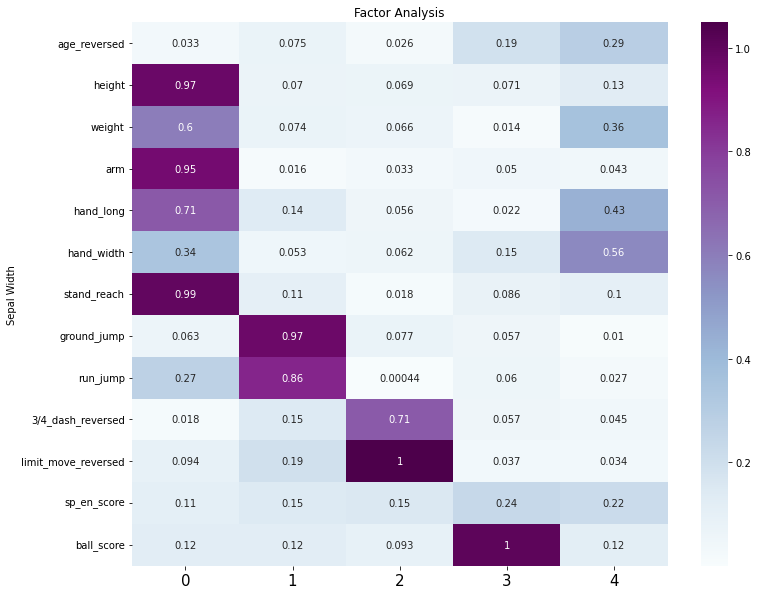

In [503]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=X.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [504]:
fig.savefig('FA.jpeg',dpi=400)

In [505]:
df_cm

,0,1,2,3,4
age_reversed,0.033003,0.074547,0.025608,0.191255,0.288780
height,0.971838,0.070220,0.068703,0.071262,0.128490
weight,0.601883,0.074478,0.065562,0.014428,0.362336
arm,0.949230,0.016243,0.032905,0.049525,0.042887
hand_long,0.712201,0.139047,0.055581,0.021709,0.433180
hand_width,0.341216,0.053257,0.061524,0.146041,0.564409
stand_reach,0.993430,0.106432,0.017532,0.085710,0.103757
ground_jump,0.062521,0.968621,0.076653,0.056919,0.010303
run_jump,0.272342,0.857046,0.000440,0.060354,0.026605
3/4_dash_reversed,0.018131,0.146631,0.708423,0.056503,0.044696


In [506]:
pd.DataFrame(fa.transform(X)).to_excel('output/fa_out.xls')

In [507]:
fa = FactorAnalyzer(4, rotation="promax")
fa.fit(X_orgin)
fa.fit_transform(X_orgin)
# # 14*5(变量个数*因子个数)
fa.loadings_

array([[ 0.07668486, -0.0661039 , -0.00543579,  0.44299888],
       [ 0.93807892, -0.01457746,  0.03481334, -0.16610877],
       [ 0.76386651, -0.07765269,  0.05028817,  0.16003127],
       [ 1.0026116 ,  0.05890235,  0.0062835 , -0.08852882],
       [ 0.90502961,  0.11863147, -0.04178755,  0.0929118 ],
       [ 0.55277791, -0.01939215, -0.00283028,  0.08379146],
       [ 0.97111235, -0.04220529, -0.0138331 , -0.1348122 ],
       [ 0.12472519,  0.97837113,  0.07052533, -0.0108364 ],
       [-0.2292663 ,  0.83852496,  0.00396504,  0.05695883],
       [-0.0495225 , -0.17966881,  0.63708616,  0.00552283],
       [ 0.05212163,  0.19263194,  1.05955427, -0.01167682],
       [ 0.0363207 ,  0.12240118, -0.10325788, -0.51112391],
       [-0.05936868,  0.11618908, -0.05000767,  0.59320608]])

Text(86.09375, 0.5, 'Sepal Width')

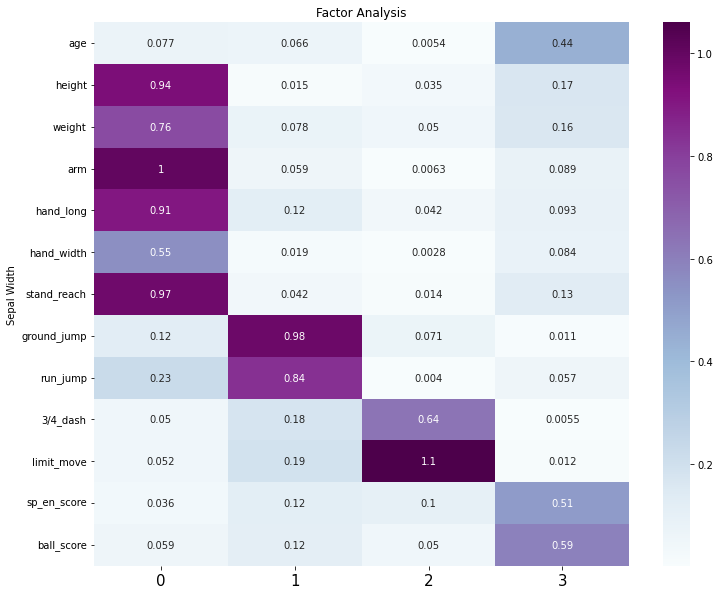

In [508]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=X_orgin.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [509]:
fig.savefig('origin.jpeg')

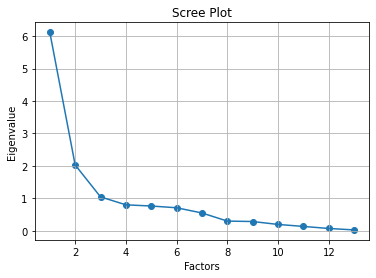

In [510]:
ev,v = fa.get_eigenvalues()

plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('碎石圖.jpeg',dpi=400)
plt.show()

In [511]:
fa.get_factor_variance()

(array([4.62042828, 1.78851649, 1.552442  , 0.90778513]),
 array([0.35541756, 0.13757819, 0.11941862, 0.06982963]),
 array([0.35541756, 0.49299575, 0.61241437, 0.68224399]))

In [512]:
df_cm[df_cm>0.5].index

Index(['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score'],
      dtype='object')

In [513]:
weight0=entropyWeight(X_orgin[df_cm[df_cm[0]>0.5].index])
weight1=entropyWeight(X_orgin[df_cm[df_cm[1]>0.5].index])
weight2=entropyWeight(X_orgin[df_cm[df_cm[2]>0.5].index])
weight3=entropyWeight(X_orgin[df_cm[df_cm[3]>0.5].index])

In [514]:
[weight0,weight1,-weight2,weight3]

[array([0.21375747, 0.18996206, 0.13282918, 0.16089313, 0.12087821,
        0.18167996]),
 array([0.41731731, 0.58268269]),
 array([-0.43112928, -0.56887072]),
 array([0.10195447, 0.89804553])]

In [515]:
ev,v=fa.get_eigenvalues()
a_i=ev/ev.sum()
a_i

array([0.47080627, 0.15599388, 0.08021386, 0.06137149, 0.05853295,
       0.05440451, 0.04200411, 0.02281418, 0.02176792, 0.01482888,
       0.01013998, 0.00526931, 0.00185265])

In [516]:
ctr=[]
for i in range(len(a_i)):
   ctr.append(a_i[0:i+1].sum())

In [517]:
ctr

[0.47080626936016073,
 0.6268001494553195,
 0.7070140083790933,
 0.7683855023360725,
 0.8269184560092516,
 0.8813229612656163,
 0.9233270705792656,
 0.9461412476418389,
 0.9679091690201359,
 0.982738052084146,
 0.9928780319563727,
 0.9981473450486399,
 1.0000000000000002]

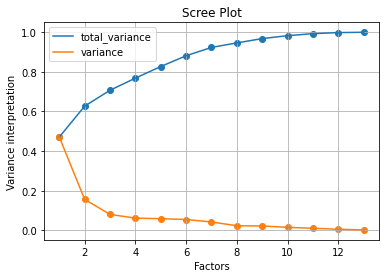

In [518]:
plt.scatter(range(1,X.shape[1]+1),ctr)
plt.plot(range(1,X.shape[1]+1),ctr,label='total_variance')
plt.scatter(range(1,X.shape[1]+1),a_i)
plt.plot(range(1,X.shape[1]+1),a_i,label='variance')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Variance interpretation')
plt.grid()
plt.legend()
plt.savefig('variance_interpretation.jpeg',dpi=400)
plt.show()

In [519]:
i=0
a_ij=[]
for w in [weight0,weight1,-weight2,weight3]:
    for w_i in w:
        a_ij.append(w_i*a_i[i])
    i+=1
print(i,a_ij)



4 [0.10063835520175958, 0.08943532677403268, 0.06253681058057754, 0.07574949338607531, 0.056910220804393584, 0.08553606261332204, 0.06509894719264395, 0.09089493290251482, -0.03458254329655067, -0.04563131562722321, 0.006257098214928572, 0.05511439574205063]


In [520]:
sum(a_ij)

0.6079577844885249

In [521]:
[df_cm[df_cm[0]>0.5].index,df_cm[df_cm[1]>0.5].index,df_cm[df_cm[2]>0.5].index,df_cm[df_cm[3]>0.5].index]

[Index(['height', 'weight', 'arm', 'hand_long', 'hand_width', 'stand_reach'], dtype='object'),
 Index(['ground_jump', 'run_jump'], dtype='object'),
 Index(['3/4_dash', 'limit_move'], dtype='object'),
 Index(['sp_en_score', 'ball_score'], dtype='object')]

In [522]:
X_orgin[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score']]

,height,weight,arm,hand_long,hand_width,stand_reach,ground_jump,run_jump,3/4_dash,limit_move,sp_en_score,ball_score
0,0.395833,0.378378,0.433333,0.214286,0.285714,0.449275,0.820650,0.700628,0.211217,0.364435,0.933333,0.089888
1,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.640038,0.605722,0.253381,0.270711,0.786667,0.786517
2,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.763183,0.803210,0.217184,0.096444,0.920000,0.606742
3,0.395833,0.202703,0.383333,0.357143,0.142857,0.376812,0.879697,0.766225,0.173031,0.173222,0.880000,0.224719
4,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.512472,0.380321,0.265314,0.491423,0.600000,0.449438
...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.625000,0.270270,0.600000,0.500000,0.428571,0.550725,0.742343,0.644103,0.182578,0.230335,1.000000,0.224719
383,0.562500,0.500000,0.550000,0.357143,0.428571,0.579710,0.418061,0.284020,0.290374,0.292469,0.893333,0.078652
384,0.479167,0.472973,0.533333,0.428571,0.428571,0.521739,0.456584,0.538730,0.297932,0.351674,0.874667,0.569663
385,0.604167,0.500000,0.716667,0.571429,0.428571,0.637681,0.575624,0.318214,0.223150,0.231590,0.958667,0.357303


In [523]:
fa_out=np.dot(np.array(X_orgin[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score']]),np.array(a_ij))

In [524]:
mask=np.abs(fa.loadings_)>0.5

In [525]:
print(fa.weights_)

[[ 0.02267174  0.00148582  0.00731787  0.1750752 ]
 [ 0.05656793  0.04940658  0.04688755 -0.25637049]
 [ 0.12912767 -0.07903224  0.08157526  0.37282209]
 [ 0.29131307  0.13105704  0.00683923 -0.03271858]
 [ 0.09590862  0.00144072 -0.00522201  0.17647951]
 [ 0.04840126 -0.00613927 -0.01502426 -0.00708598]
 [ 0.39971714 -0.03644953 -0.13458246 -0.29068377]
 [ 0.00584702  0.28050601 -0.04950092 -0.09074774]
 [-0.03410517  0.70039552 -0.13469791 -0.07818676]
 [ 0.00138023 -0.05085655  0.07757836  0.01492136]
 [ 0.01883411 -0.02400809  0.80535263  0.14478278]
 [-0.01995562  0.0184603  -0.00844271 -0.26244772]
 [-0.00170705 -0.01900384  0.00957031  0.3106737 ]]


In [526]:
df['F']=fa_out
df['F(%)']=fa_out/abs(np.array(a_ij)).sum()*100

In [527]:
df.to_excel('output/fa_out.xls')

In [528]:
df.sort_values(by='F',ascending=False).head(10)

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,...,test_score,arm+height,ground_jump,run_jump,age_reversed,3/4_dash_reversed,limit_move_reversed,res,F,F(%)
42,余嘉豪,0.000000,0.895833,0.864865,0.900000,0.857143,1.000000,0.869565,0.738462,0.714286,...,0.711864,1.795833,0.334386,0.262387,1.000000,0.772474,0.395607,0.560249,0.484090,63.000926
4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,...,0.538136,1.900000,0.512472,0.380321,1.000000,0.734686,0.508577,0.514459,0.439406,57.185629
161,沈梓捷,0.352941,0.666667,0.648649,0.833333,0.785714,0.714286,0.768116,0.846154,0.785714,...,0.640254,1.500000,0.630565,0.495464,0.647059,0.711217,0.822594,0.504173,0.438714,57.095552
319,张兆旭,0.941176,0.875000,0.797297,0.800000,0.714286,0.714286,0.840580,0.815385,0.726190,...,0.618220,1.675000,0.484370,0.317516,0.058824,0.680191,0.530544,0.634333,0.437723,56.966523
74,朱传宇,0.294118,1.000000,0.756757,0.950000,1.000000,1.000000,1.000000,0.800000,0.726190,...,0.538136,1.950000,0.236817,0.102582,0.705882,0.540971,0.000000,0.658317,0.437685,56.961600
125,李慕豪,0.647059,0.875000,0.756757,0.833333,0.714286,0.714286,0.869565,0.876923,0.773810,...,0.563559,1.708333,0.530470,0.342638,0.352941,0.693317,0.377615,0.621355,0.435901,56.729446
104,高世鳌,0.176471,0.979167,0.540541,1.000000,0.714286,0.428571,1.000000,0.892308,0.904762,...,0.641102,1.979167,0.367540,0.343336,0.823529,0.746619,0.633682,0.518629,0.430859,56.073252
119,胡金秋,0.352941,0.687500,0.608108,0.716667,1.000000,0.571429,0.710145,0.800000,0.690476,...,0.658898,1.404167,0.647300,0.445220,0.647059,0.761734,0.737448,0.500885,0.429448,55.889668
235,邹雨宸,0.411765,0.583333,0.797297,0.800000,0.785714,0.857143,0.739130,0.738462,0.690476,...,0.621610,1.383333,0.519103,0.406141,0.588235,0.657518,0.549163,0.550726,0.416833,54.247939
32,韩德君,0.941176,0.770833,0.770270,0.783333,0.714286,0.714286,0.782609,0.661538,0.690476,...,0.620763,1.554167,0.348595,0.347523,0.058824,0.813842,0.505858,0.592559,0.416231,54.169491


In [529]:
dongguandayi=df.loc[df[df['team'] == '广东东莞大益'].index,:].sort_values(by='F',ascending=False).reset_index()

In [530]:
dongguandayi.to_excel('output/广东东莞大益.xls')
dongguandayi

,index,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,...,test_score,arm+height,ground_jump,run_jump,age_reversed,3/4_dash_reversed,limit_move_reversed,res,F,F(%)
0,4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,...,0.538136,1.900000,0.512472,0.380321,1.000000,0.734686,0.508577,0.514459,0.439406,57.185629
1,13,易建联,0.941176,0.708333,0.729730,0.866667,0.857143,1.000000,0.753623,0.723077,...,0.608051,1.575000,0.476792,0.210049,0.058824,0.551313,0.072385,0.699568,0.402186,52.341644
2,6,曾繁日,0.411765,0.562500,0.567568,0.683333,0.357143,0.571429,0.623188,0.692308,...,0.673729,1.245833,0.617935,0.498255,0.588235,0.762132,0.825732,0.444124,0.369110,48.037036
3,14,苏伟,0.823529,0.750000,0.810811,0.733333,0.714286,0.571429,0.782609,0.415385,...,0.613559,1.483333,0.000000,0.026518,0.176471,0.620525,0.254603,0.629762,0.337046,43.864150
4,5,张昊,0.058824,0.562500,0.418919,0.550000,0.500000,0.285714,0.608696,0.723077,...,0.656780,1.112500,0.682033,0.694348,0.941176,0.792363,0.668410,0.376462,0.334548,43.539086
5,9,周鹏,0.823529,0.583333,0.513514,0.533333,0.428571,0.428571,0.579710,0.569231,...,0.703814,1.116667,0.505210,0.364271,0.176471,0.765314,0.572176,0.498218,0.317042,41.260849
6,15,杜润旺,0.235294,0.583333,0.581081,0.566667,0.428571,0.428571,0.550725,0.569231,...,0.678390,1.150000,0.546258,0.451500,0.764706,0.671042,0.349372,0.463012,0.313608,40.813853
7,7,张皓嘉,0.176471,0.437500,0.513514,0.500000,0.500000,0.142857,0.478261,0.584615,...,0.737288,0.937500,0.670666,0.420796,0.823529,0.753381,0.756276,0.371428,0.304923,39.683614
8,16,刘权标,0.235294,0.395833,0.364865,0.483333,0.428571,0.571429,0.405797,0.506154,...,0.682203,0.879167,0.662172,0.614794,0.764706,0.753779,0.766109,0.346929,0.304046,39.569523
9,2,赵睿,0.411765,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.461538,...,0.800847,0.720833,0.763183,0.803210,0.588235,0.782816,0.903556,0.337539,0.303876,39.547310


In [531]:
position=pd.read_excel('data/位置2.xlsx')[['name','positions']]

In [532]:
df=pd.merge(df,position,on=['name'])
df

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,...,arm+height,ground_jump,run_jump,age_reversed,3/4_dash_reversed,limit_move_reversed,res,F,F(%),positions
0,马力克,0.058824,0.395833,0.378378,0.433333,0.214286,0.285714,0.449275,0.661538,0.619048,...,0.829167,0.820650,0.700628,0.941176,0.788783,0.635565,0.317222,0.275664,35.875747,SG
1,王薪凯,0.470588,0.395833,0.351351,0.333333,0.285714,0.285714,0.376812,0.461538,0.476190,...,0.729167,0.640038,0.605722,0.529412,0.746619,0.729289,0.387184,0.286117,37.236082,SF
2,赵睿,0.411765,0.354167,0.364865,0.366667,0.285714,0.285714,0.289855,0.461538,0.535714,...,0.720833,0.763183,0.803210,0.588235,0.782816,0.903556,0.337539,0.303876,39.547310,SG
3,赵锦洋,0.117647,0.395833,0.202703,0.383333,0.357143,0.142857,0.376812,0.630769,0.595238,...,0.779167,0.879697,0.766225,0.882353,0.826969,0.826778,0.282093,0.280268,36.474952,SG
4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,...,1.900000,0.512472,0.380321,1.000000,0.734686,0.508577,0.514459,0.439406,57.185629,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,李文豪,0.117647,0.625000,0.270270,0.600000,0.500000,0.428571,0.550725,0.707692,0.678571,...,1.225000,0.742343,0.644103,0.882353,0.817422,0.769665,0.366518,0.342654,44.593993,SF
383,主昊,0.235294,0.562500,0.500000,0.550000,0.357143,0.428571,0.579710,0.507692,0.440476,...,1.112500,0.418061,0.284020,0.764706,0.709626,0.707531,0.378345,0.276320,35.961089,C
384,张彪,0.764706,0.479167,0.472973,0.533333,0.428571,0.428571,0.521739,0.476923,0.571429,...,1.012500,0.456584,0.538730,0.235294,0.702068,0.648326,0.479172,0.314568,40.938766,PF
385,曲虹霖,0.058824,0.604167,0.500000,0.716667,0.571429,0.428571,0.637681,0.676923,0.523810,...,1.320833,0.575624,0.318214,0.941176,0.776850,0.768410,0.400561,0.346361,45.076458,C


In [533]:
df[df['positions'] == 'SG'].index.append(df[df['positions'] == 'PG'].index)

Int64Index([  0,   2,   3,  12,  16,  18,  19,  27,  45,  47,
            ...
            341, 342, 343, 344, 347, 360, 366, 369, 370, 371],
           dtype='int64', length=151)

In [534]:
G=df[df['positions'].isin(['PG','SG'])]
G['label']='G'
C=df[df['positions'].isin(['C'])]
C['label']='C'
F=df[df['positions'].isin(['PF','SF'])]
F['label']='F'

In [535]:
SG=df.loc[df[df['positions'] == 'SG'].index,:]
PG=df.loc[df[df['positions'] == 'PG'].index,:]
SF=df.loc[df[df['positions'] == 'SF'].index,:]
PF=df.loc[df[df['positions'] == 'PF'].index,:]
C=df.loc[df[df['positions'] == 'C'].index,:]

In [536]:
SG.sort_values(by='F',ascending=False)

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,...,arm+height,ground_jump,run_jump,age_reversed,3/4_dash_reversed,limit_move_reversed,res,F,F(%),positions
161,沈梓捷,0.352941,0.666667,0.648649,0.833333,0.785714,0.714286,0.768116,0.846154,0.785714,...,1.500000,0.630565,0.495464,0.647059,0.711217,0.822594,0.504173,0.438714,57.095552,SG
294,区俊炫,0.235294,0.583333,0.472973,0.683333,0.642857,0.571429,0.579710,0.815385,0.785714,...,1.266667,0.853805,0.749477,0.764706,0.822593,0.623431,0.448734,0.409338,53.272535,SG
297,张永鹏,0.764706,0.666667,0.594595,0.716667,0.714286,0.714286,0.695652,0.692308,0.761905,...,1.383333,0.515314,0.561061,0.235294,0.677804,0.622594,0.558448,0.402787,52.419888,SG
194,袁振梁,0.294118,0.604167,0.621622,0.683333,0.571429,0.714286,0.463768,0.753846,0.642857,...,1.287500,0.930849,0.713189,0.705882,0.728719,0.656067,0.451093,0.402228,52.347104,SG
158,赵义明,0.176471,0.875000,1.000000,0.733333,0.428571,0.571429,0.913043,0.769231,0.666667,...,1.608333,0.316388,0.139567,0.823529,0.616945,0.455021,0.557415,0.397560,51.739632,SG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,郭阔,0.000000,0.187500,0.094595,0.283333,0.142857,0.428571,0.188406,0.246154,0.261905,...,0.470833,0.601831,0.570830,1.000000,0.941925,0.766736,0.191043,0.196478,25.570197,SG
276,周湛东,0.764706,0.062500,0.283784,0.233333,0.142857,0.285714,0.173913,0.123077,0.273810,...,0.295833,0.448058,0.606420,0.235294,0.749801,0.782427,0.335737,0.182746,23.783124,SG
187,李柯七,0.411765,0.187500,0.256757,0.216667,0.071429,0.428571,0.144928,0.000000,0.309524,...,0.404167,0.314809,0.693650,0.588235,0.679395,0.593305,0.309272,0.180503,23.491170,SG
99,张骋宇,0.823529,0.291667,0.067568,0.300000,0.214286,0.142857,0.304348,0.230769,0.321429,...,0.591667,0.415851,0.494766,0.176471,0.808671,0.377615,0.399841,0.176121,22.920893,SG


In [537]:
df[['F','res','F(%)','positions']].groupby('positions').describe().to_excel('positions/describe.xlsx')
df[['F','res','F(%)','positions']].groupby('positions').describe()

F                                                              \
          count      mean       std       min       25%       50%       75%   
positions                                                                     
C          73.0  0.322797  0.072221  0.173090  0.276320  0.331272  0.370294   
PF         80.0  0.312815  0.046967  0.142760  0.286852  0.317881  0.345088   
PG         72.0  0.257098  0.064636  0.122864  0.207803  0.252598  0.305196   
SF         83.0  0.294406  0.049587  0.152672  0.271915  0.300765  0.320691   
SG         79.0  0.282654  0.055096  0.174872  0.250361  0.275180  0.310859   

                      res            ...                      F(%)             \
                max count      mean  ...       75%       max count       mean   
positions                            ...                                        
C          0.439406  73.0  0.442447  ...  0.535158  0.699568  73.0  42.009721   
PF         0.429448  80.0  0.408310  ...  0.450686  0.728916  80.0  40.710722   
PG         0.437723  72.0  0.350146  ...  0.400504  0.708160  72.0  33.459533   
SF         0.484090  83.0  0.369800  ...  0.416711  0.560249  83.0  38.314859   
SG         0.438714  79.0  0.363789  ...  0.400409  0.571346  79.0  36.785413   

                                                                            
                std        min        25%        50%        75%        max  
positions                                                                   
C          9.399058  22.526433  35.961089  43.112754  48.191213  57.185629  
PF         6.112405  18.579195  37.331733  41.370000  44.910729  55.889668  
PG         8.411987  15.989938  27.044153  32.873864  39.719112  56.966523  
SF         6.453411  19.869242  35.387807  39.142401  41.735713  63.000926  
SG         7.170299  22.758373  32.582725  35.812731  40.456104  57.095552  

[5 rows x 24 columns]

In [538]:
df['team'].drop_duplicates()

0      广东东莞大益
17       辽宁本钢
36     浙江稠州金租
54       山东高速
71     新疆伊力王酒
88     青岛每日优鲜
105    浙江广厦控股
125      北京首钢
146    深圳马可波罗
164    九台农商银行
180    四川金荣实业
200    时代中国广州
220      北京控股
238      上海久事
257    山西汾酒股份
280    福建浔兴股份
301     天津先行者
322    南京同曦宙光
344     苏州肯帝亚
365    宁波甬兴证券
Name: team, dtype: object

In [539]:
des=df[['F','res','F(%)','team']].groupby('team').describe()

In [540]:
des['F'].sort_values(by='75%',ascending=False)

,count,mean,std,min,25%,50%,75%,max
team,,,,,,,,
辽宁本钢,19.0,0.322905,0.058380,0.186833,0.279509,0.319784,0.365974,0.416231
青岛每日优鲜,17.0,0.288698,0.078270,0.152151,0.250615,0.301265,0.347787,0.430859
时代中国广州,20.0,0.290822,0.068764,0.202165,0.232245,0.277766,0.344200,0.413527
新疆伊力王酒,17.0,0.309299,0.059752,0.218531,0.245939,0.319221,0.342390,0.437685
天津先行者,21.0,0.295748,0.066975,0.182480,0.229002,0.310391,0.339756,0.437723
北京控股,18.0,0.314285,0.051959,0.191748,0.278951,0.319757,0.339309,0.416833
浙江稠州金租,18.0,0.298432,0.074514,0.196478,0.234091,0.302570,0.339047,0.484090
九台农商银行,16.0,0.309638,0.047939,0.240919,0.272650,0.315529,0.334869,0.400038
广东东莞大益,17.0,0.310022,0.058701,0.172678,0.280268,0.304046,0.334548,0.439406


In [541]:
df[['F','res','F(%)','team']].groupby('team').max()[['F','F(%)']].sort_values(by='F',ascending=False)

,F,F(%)
team,,
浙江稠州金租,0.484090,63.000926
广东东莞大益,0.439406,57.185629
深圳马可波罗,0.438714,57.095552
天津先行者,0.437723,56.966523
新疆伊力王酒,0.437685,56.961600
北京首钢,0.435901,56.729446
青岛每日优鲜,0.430859,56.073252
浙江广厦控股,0.429448,55.889668
北京控股,0.416833,54.247939


In [542]:
team_F=[]
for key,v in df[['F','res','F(%)','team','positions']].groupby('team'):
    #print(key,v.sort_values(by='F',ascending=False).head(3)['F'].mean())
    '''
    p_score_sum=0
    for pk,pv in v.groupby('positions'):
        p_score_sum+=pv['F'].max()
    '''

        #print(key,pk,pv['F'].max(),p_score_sum)
    #team_F.append((key,p_score_sum))
    #v=v. sort_values(by='F',ascending=False).head(3)['F'].mean()
    team_F.append((key,v.sort_values(by='F',ascending=False).head(3)['F'].mean()))
team_F=pd.DataFrame(team_F,columns=['name','f_top10_avg'])
team_F=team_F.sort_values(by='f_top10_avg',ascending=False).reset_index()
team_F['rank']=range(1,21)
team_F

,index,name,f_top10_avg,rank
0,14,浙江稠州金租,0.411572,1
1,18,辽宁本钢,0.406241,2
2,10,广东东莞大益,0.403567,3
3,12,时代中国广州,0.398688,4
4,11,新疆伊力王酒,0.390988,5
5,8,山东高速,0.389536,6
6,6,天津先行者,0.388462,7
7,15,深圳马可波罗,0.387084,8
8,2,北京控股,0.386327,9
9,19,青岛每日优鲜,0.385728,10


In [543]:
rank=pd.merge(pd.read_excel('team_rank/21_rank.xlsx'),team_F,on='name')
#rank['f_top10_avg']=minmax(rank['f_top10_avg'])
rank

,name,21_rank,index,f_top10_avg,rank
0,广东东莞大益,1,10,0.403567,3
1,辽宁本钢,2,18,0.406241,2
2,浙江稠州金租,3,14,0.411572,1
3,山东高速,4,8,0.389536,6
4,新疆伊力王酒,5,11,0.390988,5
5,青岛每日优鲜,6,19,0.385728,10
6,浙江广厦控股,7,13,0.382730,12
7,北京首钢,8,3,0.379939,14
8,深圳马可波罗,9,15,0.387084,8
9,九台农商银行,10,1,0.379995,13


In [544]:
rank[['21_rank','f_top10_avg']].corr()

,21_rank,f_top10_avg
21_rank,1.000000,-0.756171
f_top10_avg,-0.756171,1.000000


In [545]:
rank

,name,21_rank,index,f_top10_avg,rank
0,广东东莞大益,1,10,0.403567,3
1,辽宁本钢,2,18,0.406241,2
2,浙江稠州金租,3,14,0.411572,1
3,山东高速,4,8,0.389536,6
4,新疆伊力王酒,5,11,0.390988,5
5,青岛每日优鲜,6,19,0.385728,10
6,浙江广厦控股,7,13,0.382730,12
7,北京首钢,8,3,0.379939,14
8,深圳马可波罗,9,15,0.387084,8
9,九台农商银行,10,1,0.379995,13


In [552]:
X_SG=SG[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]
X_PG=PG[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]
X_PF=PF[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]
X_SF=SF[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]
X_C=C[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]
X_G=G[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]
X_F=F[['age', 'height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
        'sp_en_score', 'ball_score']]

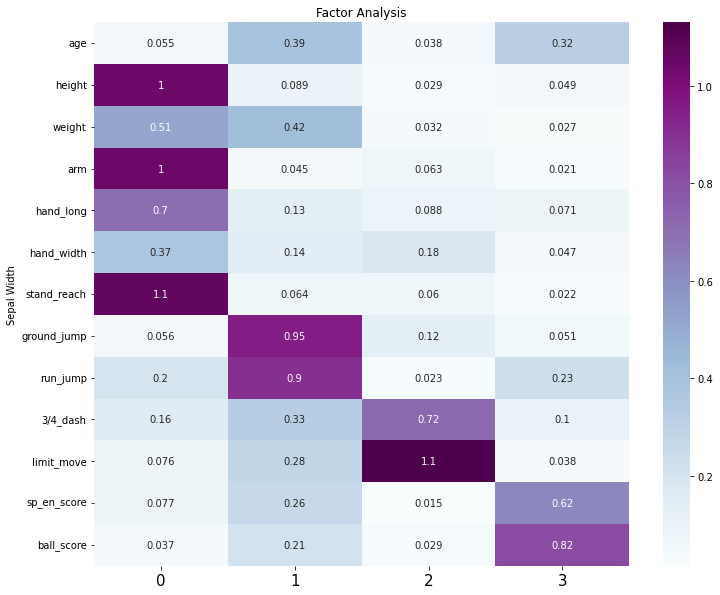

In [553]:
fa = FactorAnalyzer(4, rotation="promax")
X_C,_,_=minmax(X_C)
fa.fit(X_SG)
fa.fit_transform(X_C)
# # 14*5(变量个数*因子个数)
#print(fa.loadings_)

df_cm = pd.DataFrame(np.abs(fa.loadings_),index=X_C.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")
fig.savefig('figs/loading_C.jpeg')

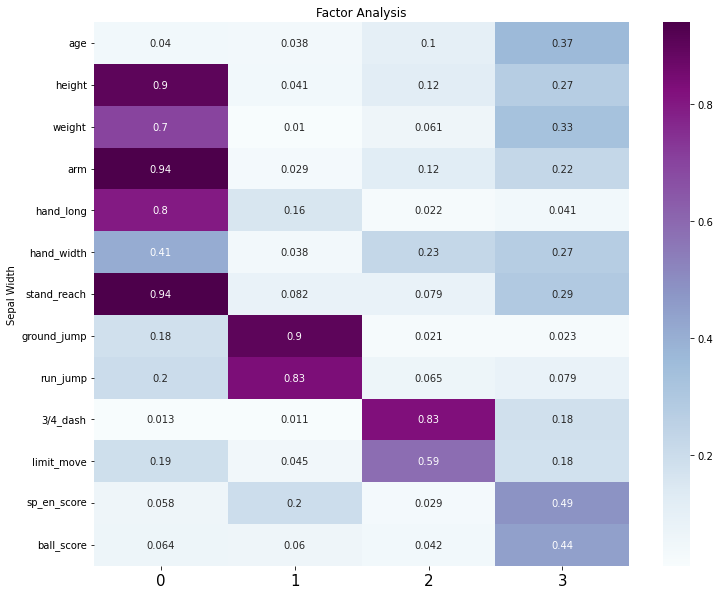

In [554]:
fa = FactorAnalyzer(4, rotation="promax")
X_F,_,_=minmax(X_F)
fa.fit(X_F)
fa.fit_transform(X_F)
# # 14*5(变量个数*因子个数)
#print(fa.loadings_)

df_cm = pd.DataFrame(np.abs(fa.loadings_),index=X_C.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")
fig.savefig('figs/loading_F.jpeg')

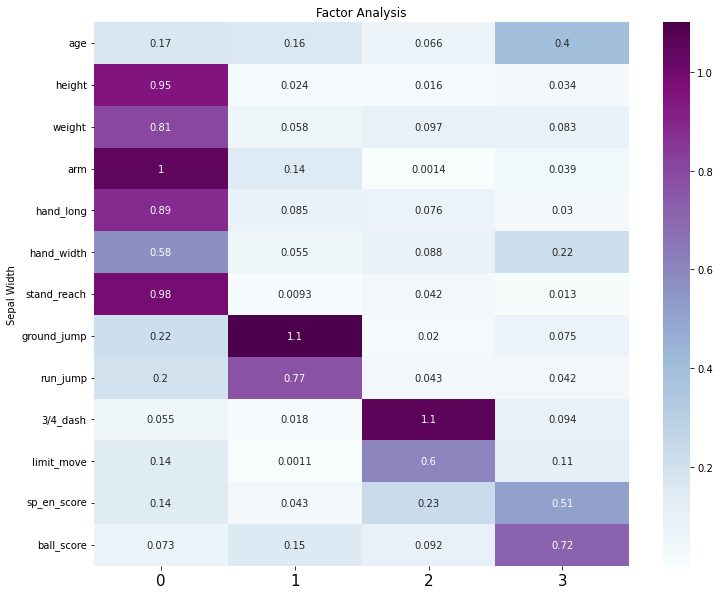

In [555]:
fa = FactorAnalyzer(4, rotation="promax")
X_G,_,_=minmax(X_G)
fa.fit(X_G)
fa.fit_transform(X_G)
# # 14*5(变量个数*因子个数)
#print(fa.loadings_)

df_cm = pd.DataFrame(np.abs(fa.loadings_),index=X_G.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")
fig.savefig('figs/loading_G.jpeg')

In [ ]:
#fX_G.max()

In [556]:
C['F_pos_corrected']=np.dot(np.array(X_C[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score']]),np.array(a_ij))
G['F_pos_corrected']=np.dot(np.array(X_G[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score']]),np.array(a_ij))
F['F_pos_corrected']=np.dot(np.array(X_F[['height', 'weight', 'arm', 'hand_long', 'hand_width',
       'stand_reach', 'ground_jump', 'run_jump', '3/4_dash', 'limit_move',
       'sp_en_score', 'ball_score']]),np.array(a_ij))

In [557]:
C['F_pos_corrected'].describe()

count    73.000000
mean      0.315305
std       0.074528
min       0.156599
25%       0.263530
50%       0.323519
75%       0.369880
max       0.434880
Name: F_pos_corrected, dtype: float64

In [558]:
F['F_pos_corrected'].describe()

count    163.000000
mean       0.294893
std        0.057342
min        0.105102
25%        0.261023
50%        0.298490
75%        0.329411
max        0.493553
Name: F_pos_corrected, dtype: float64

In [559]:
G.to_excel('output/G_pos_corrected.xlsx')
G['F_pos_corrected'].describe()

count    151.000000
mean       0.275582
std        0.070307
min        0.102848
25%        0.229460
50%        0.274613
75%        0.321155
max        0.470400
Name: F_pos_corrected, dtype: float64

In [560]:
C['label']='C'

In [561]:
pos_corrected_scores=pd.concat([F,G,C]).sort_values(by='F_pos_corrected',ascending=False)
pos_corrected_scores.to_excel('output/position_corrected.xlsx')
pos_corrected_scores

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,...,run_jump,age_reversed,3/4_dash_reversed,limit_move_reversed,res,F,F(%),positions,label,F_pos_corrected
42,余嘉豪,0.000000,0.895833,0.864865,0.900000,0.857143,1.000000,0.869565,0.738462,0.714286,...,0.262387,1.000000,0.772474,0.395607,0.560249,0.484090,63.000926,SF,F,0.493553
161,沈梓捷,0.352941,0.666667,0.648649,0.833333,0.785714,0.714286,0.768116,0.846154,0.785714,...,0.495464,0.647059,0.711217,0.822594,0.504173,0.438714,57.095552,SG,G,0.470400
319,张兆旭,0.941176,0.875000,0.797297,0.800000,0.714286,0.714286,0.840580,0.815385,0.726190,...,0.317516,0.058824,0.680191,0.530544,0.634333,0.437723,56.966523,PG,G,0.465802
119,胡金秋,0.352941,0.687500,0.608108,0.716667,1.000000,0.571429,0.710145,0.800000,0.690476,...,0.445220,0.647059,0.761734,0.737448,0.500885,0.429448,55.889668,PF,F,0.435844
4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,...,0.380321,1.000000,0.734686,0.508577,0.514459,0.439406,57.185629,C,C,0.434880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,马光翰,0.235294,0.083333,0.148649,0.133333,0.000000,0.142857,0.144928,0.153846,0.333333,...,0.725750,0.764706,0.783214,0.709205,0.222707,0.159198,20.718563,PG,G,0.142764
102,林韦翰,0.764706,0.000000,0.067568,0.033333,0.285714,0.285714,0.000000,0.000000,0.095238,...,0.600140,0.235294,0.831344,0.761088,0.310876,0.152151,19.801356,PG,G,0.141782
267,席益民,0.117647,0.041667,0.108108,0.116667,0.000000,0.142857,0.115942,0.169231,0.297619,...,0.716678,0.882353,0.800318,0.411506,0.280250,0.152672,19.869242,SF,F,0.121036
261,张涵钧,0.647059,0.062500,0.229730,0.200000,0.142857,0.142857,0.130435,0.076923,0.154762,...,0.504536,0.352941,0.772076,0.599372,0.309802,0.142760,18.579195,PF,F,0.105102


In [562]:
pos_corrected_scores[['F','F_pos_corrected']].corr()

,F,F_pos_corrected
F,1.000000,0.989153
F_pos_corrected,0.989153,1.000000


In [563]:
pos_corrected_scores[['F','F_pos_corrected']].describe()

,F,F_pos_corrected
count,387.000000,387.000000
mean,0.294227,0.291209
std,0.061961,0.067439
min,0.122864,0.102848
25%,0.251674,0.247175
50%,0.297452,0.293280
75%,0.334927,0.338051
max,0.484090,0.493553


In [564]:
pos_corrected_scores[['F','res','F(%)','F_pos_corrected','label']].groupby('label').describe()

F                                                              \
       count      mean       std       min       25%       50%       75%   
label                                                                      
C       73.0  0.322797  0.072221  0.173090  0.276320  0.331272  0.370294   
F      163.0  0.303441  0.049046  0.142760  0.276225  0.309122  0.334259   
G      151.0  0.270468  0.060992  0.122864  0.230024  0.271072  0.310331   

                   res            ...       F(%)            F_pos_corrected  \
            max  count      mean  ...        75%        max           count   
label                             ...                                         
C      0.439406   73.0  0.442447  ...  48.191213  57.185629            73.0   
F      0.484090  163.0  0.388701  ...  43.501521  63.000926           163.0   
G      0.438714  151.0  0.357283  ...  40.387405  57.095552           151.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
label                                                                        
C      0.315305  0.074528  0.156599  0.263530  0.323519  0.369880  0.434880  
F      0.294893  0.057342  0.105102  0.261023  0.298490  0.329411  0.493553  
G      0.275582  0.070307  0.102848  0.229460  0.274613  0.321155  0.470400  

[3 rows x 32 columns]

In [565]:
corrected_team_F=[]
for key,v in pos_corrected_scores[['F','res','F(%)','team','positions','F_pos_corrected','label']].groupby('team'):
    #print(key,v.sort_values(by='F',ascending=False).head(3)['F'].mean())

    p_score_sum=0
    for pk,pv in v.groupby('label'):
        p_score_sum+=pv['F_pos_corrected'].max()


        #print(key,pk,pv['F'].max(),p_score_sum)
    corrected_team_F.append((key,p_score_sum))
    #v=v. sort_values(by='F',ascending=False).head(3)['F'].mean()
    #corrected_team_F.append((key,v.sort_values(by='F_pos_corrected',ascending=False).head(5)['F_pos_corrected'].mean()))
corrected_team_F=pd.DataFrame(corrected_team_F,columns=['name','f_top5_avg'])
corrected_team_F=corrected_team_F.sort_values(by='f_top5_avg',ascending=False).reset_index()
corrected_team_F['rank']=range(1,21)
corrected_team_F

,index,name,f_top5_avg,rank
0,12,时代中国广州,1.217851,1
1,6,天津先行者,1.174247,2
2,11,新疆伊力王酒,1.146359,3
3,14,浙江稠州金租,1.143345,4
4,9,山西汾酒股份,1.138794,5
5,18,辽宁本钢,1.125183,6
6,2,北京控股,1.121953,7
7,3,北京首钢,1.104364,8
8,17,苏州肯帝亚,1.095390,9
9,0,上海久事,1.084637,10


In [566]:
rank=pd.merge(pd.read_excel('team_rank/21_rank.xlsx'),corrected_team_F,on='name')
#rank['f_top10_avg']=minmax(rank['f_top10_avg'])
rank

,name,21_rank,index,f_top5_avg,rank
0,广东东莞大益,1,10,1.059082,16
1,辽宁本钢,2,18,1.125183,6
2,浙江稠州金租,3,14,1.143345,4
3,山东高速,4,8,1.051074,17
4,新疆伊力王酒,5,11,1.146359,3
5,青岛每日优鲜,6,19,1.066095,14
6,浙江广厦控股,7,13,1.061427,15
7,北京首钢,8,3,1.104364,8
8,深圳马可波罗,9,15,1.068488,12
9,九台农商银行,10,1,1.067788,13


In [567]:
rank[['f_top5_avg','21_rank' ]].corr()

,f_top5_avg,21_rank
f_top5_avg,1.000000,-0.090815
21_rank,-0.090815,1.000000


In [568]:
C.describe().to_excel('describe/C.xls')
F.describe().to_excel('describe/F.xls')
G.describe().to_excel('describe/G.xls')

In [569]:
np.array(a_ij)

array([ 0.10063836,  0.08943533,  0.06253681,  0.07574949,  0.05691022,
        0.08553606,  0.06509895,  0.09089493, -0.03458254, -0.04563132,
        0.0062571 ,  0.0551144 ])

In [570]:
pos_corrected_scores['physical_fitness']=np.dot(pos_corrected_scores[['height', 'weight', 'arm', 'hand_long', 'hand_width','stand_reach']],np.array(a_ij)[:6])
pos_corrected_scores['jump']=np.dot(pos_corrected_scores[['ground_jump', 'run_jump']],np.array(a_ij)[6:8])
pos_corrected_scores['agile']=np.dot(pos_corrected_scores[['3/4_dash', 'limit_move']],-np.array(a_ij)[8:10])
pos_corrected_scores['skill']=np.dot(pos_corrected_scores[['sp_en_score', 'ball_score']],np.array(a_ij)[10:12])

In [571]:
pos_corrected_scores

,name,age,height,weight,arm,hand_long,hand_width,stand_reach,ground_reach,run_reach,...,res,F,F(%),positions,label,F_pos_corrected,physical_fitness,jump,agile,skill
42,余嘉豪,0.000000,0.895833,0.864865,0.900000,0.857143,1.000000,0.869565,0.738462,0.714286,...,0.560249,0.484090,63.000926,SF,F,0.493553,0.420005,0.045618,0.035448,0.053915
161,沈梓捷,0.352941,0.666667,0.648649,0.833333,0.785714,0.714286,0.768116,0.846154,0.785714,...,0.504173,0.438714,57.095552,SG,G,0.470400,0.343088,0.086084,0.018082,0.027624
319,张兆旭,0.941176,0.875000,0.797297,0.800000,0.714286,0.714286,0.840580,0.815385,0.726190,...,0.634333,0.437723,56.966523,PG,G,0.465802,0.376051,0.060393,0.032482,0.033760
119,胡金秋,0.352941,0.687500,0.608108,0.716667,1.000000,0.571429,0.710145,0.800000,0.690476,...,0.500885,0.429448,55.889668,PF,F,0.435844,0.337406,0.082607,0.020220,0.029656
4,徐昕,0.000000,1.000000,0.621622,0.900000,0.571429,0.714286,0.913043,0.907692,0.845238,...,0.514459,0.439406,57.185629,C,C,0.434880,0.374550,0.067931,0.031600,0.028525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,马光翰,0.235294,0.083333,0.148649,0.133333,0.000000,0.142857,0.144928,0.153846,0.333333,...,0.222707,0.159198,20.718563,PG,G,0.142764,0.050546,0.100644,0.020766,0.028775
102,林韦翰,0.764706,0.000000,0.067568,0.033333,0.285714,0.285714,0.000000,0.000000,0.095238,...,0.310876,0.152151,19.801356,PG,G,0.141782,0.046030,0.088404,0.016734,0.034451
267,席益民,0.117647,0.041667,0.108108,0.116667,0.000000,0.142857,0.115942,0.169231,0.297619,...,0.280250,0.152672,19.869242,SF,F,0.121036,0.039205,0.103910,0.033759,0.043317
261,张涵钧,0.647059,0.062500,0.229730,0.200000,0.142857,0.142857,0.130435,0.076923,0.154762,...,0.309802,0.142760,18.579195,PF,F,0.105102,0.069451,0.074781,0.026163,0.024691


In [652]:
team_F=[]
for key,v in pos_corrected_scores[['F','res','F(%)','team','positions','jump','physical_fitness','agile','skill','F_pos_corrected']].groupby('team'):
    #print(key,v.sort_values(by='F',ascending=False).head(3)['F'].mean())
    '''
    p_score_sum=0
    for pk,pv in v.groupby('positions'):
        p_score_sum+=pv['F'].max()
    '''

        #print(key,pk,pv['F'].max(),p_score_sum)
    #team_F.append((key,p_score_sum))
    #v=v. sort_values(by='F',ascending=False).head(3)['F'].mean()
    team_F.append((key,
                   v.sort_values(by='F',ascending=False).head(5)['F'].mean(),
                   v.sort_values(by='F_pos_corrected',ascending=False).head(5)['F_pos_corrected'].mean(),
                   v.sort_values(by='physical_fitness',ascending=False).head(5)['physical_fitness'].mean(),
                   v.sort_values(by='agile',ascending=False).head(5)['agile'].mean(),
                   v.sort_values(by='skill',ascending=False).head(5)['skill'].mean(),
                   v.sort_values(by='jump',ascending=False).head(5)['jump'].mean()
                   ))
team_F=pd.DataFrame(team_F,columns=['name','f_top5_avg','F_pos_corrected','physical_fitness','agile','skill','jump'])
team_F=team_F.sort_values(by='f_top5_avg',ascending=False).reset_index()
team_F['rank']=range(1,21)
team_F

,index,name,f_top5_avg,F_pos_corrected,physical_fitness,agile,skill,jump,rank
0,18,辽宁本钢,0.393974,0.399576,0.299379,0.029811,0.041290,0.135196,1
1,14,浙江稠州金租,0.385965,0.401367,0.292175,0.024481,0.038722,0.125787,2
2,12,时代中国广州,0.384795,0.391958,0.310071,0.043561,0.044976,0.119617,3
3,10,广东东莞大益,0.376459,0.369571,0.332496,0.049345,0.038627,0.123421,4
4,11,新疆伊力王酒,0.375875,0.373710,0.312949,0.038713,0.040452,0.103701,5
5,6,天津先行者,0.371796,0.384554,0.299282,0.029808,0.041164,0.110945,6
6,19,青岛每日优鲜,0.371072,0.369341,0.286584,0.029772,0.042680,0.117512,7
7,2,北京控股,0.370765,0.368045,0.307660,0.030811,0.036818,0.114555,8
8,16,福建浔兴股份,0.366672,0.381064,0.297360,0.034839,0.045558,0.122606,9
9,13,浙江广厦控股,0.366604,0.364921,0.296217,0.037797,0.035680,0.107026,10


In [653]:
rank=pd.merge(pd.read_excel('team_rank/21_rank.xlsx'),team_F,on='name')
#rank['f_top10_avg']=minmax(rank['f_top10_avg'])
rank

,name,21_rank,index,f_top5_avg,F_pos_corrected,physical_fitness,agile,skill,jump,rank
0,广东东莞大益,1,10,0.376459,0.369571,0.332496,0.049345,0.038627,0.123421,4
1,辽宁本钢,2,18,0.393974,0.399576,0.299379,0.029811,0.041290,0.135196,1
2,浙江稠州金租,3,14,0.385965,0.401367,0.292175,0.024481,0.038722,0.125787,2
3,山东高速,4,8,0.363339,0.360609,0.278425,0.032057,0.035880,0.122859,15
4,新疆伊力王酒,5,11,0.375875,0.373710,0.312949,0.038713,0.040452,0.103701,5
5,青岛每日优鲜,6,19,0.371072,0.369341,0.286584,0.029772,0.042680,0.117512,7
6,浙江广厦控股,7,13,0.366604,0.364921,0.296217,0.037797,0.035680,0.107026,10
7,北京首钢,8,3,0.364849,0.360883,0.308686,0.043604,0.037258,0.111727,12
8,深圳马可波罗,9,15,0.360597,0.372579,0.304298,0.038940,0.039988,0.104828,17
9,九台农商银行,10,1,0.363383,0.360985,0.295418,0.034436,0.045177,0.137794,14


In [654]:
rank.corr()

,21_rank,index,f_top5_avg,F_pos_corrected,physical_fitness,agile,skill,jump,rank
21_rank,1.000000,-0.290226,-0.633737,-0.406711,-0.471314,-0.196256,0.414813,-0.280024,0.548872
index,-0.290226,1.000000,0.499097,0.496006,0.105885,-0.241906,0.423611,-0.004277,-0.484211
f_top5_avg,-0.633737,0.499097,1.000000,0.869481,0.597215,0.006917,0.087856,0.352499,-0.946157
F_pos_corrected,-0.406711,0.496006,0.869481,1.000000,0.493287,-0.080507,0.142857,0.269457,-0.804036
physical_fitness,-0.471314,0.105885,0.597215,0.493287,1.000000,0.533858,-0.061048,-0.013218,-0.587978
agile,-0.196256,-0.241906,0.006917,-0.080507,0.533858,1.000000,-0.196044,-0.099180,0.018572
skill,0.414813,0.423611,0.087856,0.142857,-0.061048,-0.196044,1.000000,0.165929,-0.118392
jump,-0.280024,-0.004277,0.352499,0.269457,-0.013218,-0.099180,0.165929,1.000000,-0.264007
rank,0.548872,-0.484211,-0.946157,-0.804036,-0.587978,0.018572,-0.118392,-0.264007,1.000000


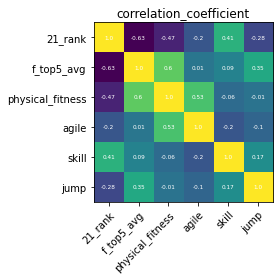

In [655]:
matrix=rank[['21_rank','f_top5_avg','physical_fitness','agile','skill','jump']].corr().to_numpy()
col_labels=['21_rank','f_top5_avg','physical_fitness','agile','skill','jump']

fig, ax = plt.subplots()

im = ax.imshow(matrix)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(col_labels)), labels=col_labels)
ax.set_yticks(np.arange(len(col_labels)), labels=col_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.

for i in range(len(col_labels)):
    for j in range(len(col_labels)):
        if i!=j and matrix[i,j]>0.9:
            info=str(round(matrix[i, j],2))+'*'
        else:
            info=round(matrix[i, j],2)
        text = ax.text(i, j, info,
                       ha="center", va="center", color="w",size='xx-small')


#plt.figure(dpi=100,figsize=(5,4))
ax.set_title("correlation_coefficient")
fig.tight_layout()
fig.savefig('figs/rank_corr.jpeg',dpi=400)
plt.show()

In [589]:
import scipy
x=rank['21_rank']
y=rank['f_top10_avg']

In [590]:
scipy.stats.pearsonr(x, y)

(-0.6337374547364867, 0.0026976600841503977)

In [591]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.5488721804511278, pvalue=0.012202217962291392)

In [592]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=-0.4210526315789474, pvalue=0.009056382412965046)